In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# import the data from a file and show first lines
file_train= 'path\\train.csv'
df=pd.read_csv(file_train, sep=',',)
df.head()

,Id,X1,X2,y
0,0,9.506128,-0.404162,1
1,1,0.249723,1.234908,1
2,2,7.311201,-4.120096,1
3,3,-1.385372,-1.216265,1
4,4,-11.565323,4.387536,0


In [158]:
# create a dataframe with all training data except the target column y and the column Id which is not used here
X = df.drop(columns=['Id', 'y'])

# check that the columns has been removed
X.head()


,X1,X2
0,9.506128,-0.404162
1,0.249723,1.234908
2,7.311201,-4.120096
3,-1.385372,-1.216265
4,-11.565323,4.387536


In [159]:
# separate target values
y = df['y'].values

# view target values
y[0:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [160]:
# split dataset into train (80%) and test data (20%); random_state=1 makes it reproducible; stratify=y ensures that the proportion stays in test and training data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [161]:
# define the KNN model to use it with a simple holdout method
model = KNeighborsClassifier(n_neighbors=3)

# train the model using the training sets
model.fit(X_train, y_train)

# show first 5 model predictions on the test data
model.predict(X_test)[0:5]

# check accuracy of our model on the test data
model.score(X_test, y_test)

0.9506172839506173

In [162]:
# create a new KNN model to use it with cross validation
model_cv = KNeighborsClassifier(n_neighbors=17)

# train model with cross validation of 5 
cv_scores = cross_val_score(model_cv, X, y, cv=5)

# print each cv score (=accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.95987654 0.95864198 0.95061728 0.95555556 0.96358025]
cv_scores mean:0.9576543209876544


In [163]:
# create a new KNN model to see how GridSearchCV works
knn_model = KNeighborsClassifier()

# create a dictionary of all values we want to test for n neighbors 1 to 25
param_grid = {'n_neighbors': np.arange(1, 25)}

# use gridsearch to test all values for n neighbors
knn_gscv = GridSearchCV(knn_model, param_grid, cv=5)

# fit model to data
knn_gscv.fit(X, y)

# check top performing value for n
knn_gscv.best_params_



{'n_neighbors': 17}

In [164]:
# check mean score for the top performing value of n
knn_gscv.best_score_

0.9576543209876544

In [165]:
# make predictions on the unseen test data
file_new= 'path\\test.csv'
df_new=pd.read_csv(file_new, sep=',',)
df_new.head()

,Id,X1,X2
0,0,-1.787139,1.565062
1,1,-3.506047,2.317350
2,2,-4.229388,-2.612948
3,3,0.980246,0.090494
4,4,-3.380691,4.589728


In [172]:
# create a dataframe with all training data except the target column y and the column Id which is not used here
X_new = df_new.drop(columns=['Id'])

# check that the columns has been removed
X_new.head()

,X1,X2
0,-1.787139,1.565062
1,-3.506047,2.317350
2,-4.229388,-2.612948
3,0.980246,0.090494
4,-3.380691,4.589728


In [173]:
model.predict(X_new)[0:5]

array([0, 0, 1, 1, 1], dtype=int64)

In [179]:
model_cv.fit(X, y)
model_cv.predict(X_new)[0:5]
predicted = model_cv.predict(X_new)
print(predicted[:10])


[0 0 1 1 1 0 0 0 0 0]


In [194]:
# add calculated y value to csv
df_new['y'] = predicted
df_submission = df_new.drop(columns=['X1','X2'])
print(df_submission.to_string(index=False))
submission_file = 'path\\submission.csv'
df_submission.to_csv(submission_file, index=False)

Id  y
   0  0
   1  0
   2  1
   3  1
   4  1
   5  0
   6  0
   7  0
   8  0
   9  0
  10  0
  11  1
  12  0
  13  1
  14  0
  15  0
  16  1
  17  1
  18  1
  19  1
  20  1
  21  0
  22  0
  23  0
  24  1
  25  0
  26  1
  27  0
  28  0
  29  1
  30  1
  31  1
  32  1
  33  1
  34  0
  35  0
  36  1
  37  1
  38  0
  39  0
  40  0
  41  0
  42  0
  43  0
  44  0
  45  1
  46  1
  47  1
  48  1
  49  0
  50  0
  51  0
  52  1
  53  0
  54  0
  55  1
  56  1
  57  1
  58  0
  59  0
  60  0
  61  0
  62  0
  63  1
  64  0
  65  1
  66  1
  67  0
  68  1
  69  1
  70  0
  71  1
  72  0
  73  1
  74  0
  75  0
  76  1
  77  0
  78  0
  79  1
  80  1
  81  0
  82  1
  83  0
  84  1
  85  1
  86  0
  87  0
  88  1
  89  0
  90  0
  91  1
  92  1
  93  0
  94  0
  95  0
  96  0
  97  1
  98  1
  99  0
 100  1
 101  1
 102  0
 103  0
 104  0
 105  1
 106  1
 107  1
 108  1
 109  1
 110  0
 111  1
 112  0
 113  0
 114  0
 115  0
 116  0
 117  1
 118  1
 119  0
 120  1
 121  0
 122  1
 123  0
 1

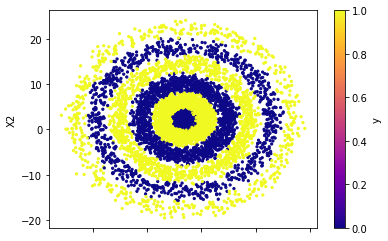

In [185]:
# show figure with colors
plt.figure()
df_new.plot.scatter(x='X1',y='X2',c='y', cmap='plasma', s=5)
plt.show()

In [156]:
file_submission= 'path\\test.csv'
df_submission=pd.read_csv(file_submission, sep=',',)
df_new.head()


,Id,X1,X2
0,0,-1.787139,1.565062
1,1,-3.506047,2.317350
2,2,-4.229388,-2.612948
3,3,0.980246,0.090494
4,4,-3.380691,4.589728
